In [2]:
# Load the training data and pre-process it

import pandas as pd
Import numpy as np

np.random.seed(10) # Set a seed to make our results reproducible

from process_data import pre_process_data
X_train = pd.read_csv('german_credit_train.csv', sep=",")
y_train = X_train['Creditability']
X_train = pre_process_data(X_train)
X_train = X_train.drop(columns=['Age (years)'])
X_train['Creditability'] = ['Good' if x == 1 else 'Bad' for x in y_train] 


SyntaxError: invalid syntax (<ipython-input-2-4e0e809689fb>, line 4)

In [3]:
# Load the training data and pre-process it

import pandas as pd
import numpy as np

np.random.seed(10) # Set a seed to make our results reproducible

from process_data import pre_process_data
X_train = pd.read_csv('german_credit_train.csv', sep=",")
y_train = X_train['Creditability']
X_train = pre_process_data(X_train)
X_train = X_train.drop(columns=['Age (years)'])
X_train['Creditability'] = ['Good' if x == 1 else 'Bad' for x in y_train] 



In [4]:
X_train.shape


(600, 11)

In [5]:
X_train.head()


,Account Balance,Payment Status,Savings/Stock Value,Employment Length,Sex & Marital Status,NumberCredits,Guarantors,Concurrent Credits,Purpose,AgeGroups,Creditability
0,SomeBalance,NoProblem,NoSavings,OneToFour,MaleSingle,OnePlus,No,NoCredit,UsedCar,MidAgeAdult,Good
1,SomeBalance,NoProblem,NoSavings,AboveSevent,MaleMarried,One,No,NoCredit,HouseRelated,MidAgeAdult,Good
2,NoBalance,NoProblem,NoSavings,BellowOneYear,MaleMarried,OnePlus,No,NoCredit,NewCar,MidAgeAdult,Good
3,NoBalance,NoProblem,BellowHundred,FourToSevent,MaleMarried,One,No,NoCredit,Other,MidAgeAdult,Good
4,SomeBalance,NoProblem,NoSavings,OneToFour,MaleMarried,One,No,NoCredit,HouseRelated,Young,Good


(array([0, 1, 2]),
 [Text(0, 0, 'MaleMarried'), Text(1, 0, 'MaleSingle'), Text(2, 0, 'Female')])

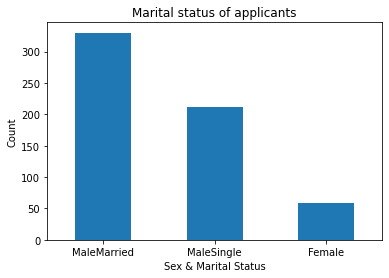

In [6]:
import matplotlib.pyplot as plt
X_train['Sex & Marital Status'].value_counts().plot(kind='bar', title="Marital status of applicants", )
plt.ylabel('Count')
plt.xlabel('Sex & Marital Status')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Good'), Text(1, 0, 'Bad')])

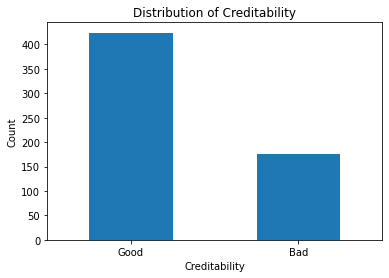

In [7]:
X_train['Creditability'].value_counts().plot(kind='bar', title="Distribution of Creditability", )
plt.ylabel('Count')
plt.xlabel('Creditability')
plt.xticks(rotation=0)

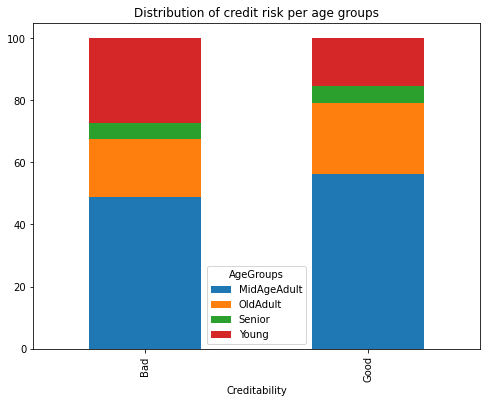

In [8]:
from process_data import plot_marginal_distribution
plot_marginal_distribution(X_train, 
                           var1='AgeGroups', 
                           var2='Creditability', 
                           title='Distribution of credit risk per age groups')

In [10]:
X_train = pd.read_csv('german_credit_train.csv', sep=",")
X_test = pd.read_csv('german_credit_test.csv', sep=",")

y_train = X_train['Creditability']
y_test = X_test['Creditability']


In [11]:
# Preprocess the data set
X_train = pre_process_data(X_train)
# Drop the 'Age (years) column'
X_train = X_train.drop(columns=['Age (years)'])


In [12]:
from sklearn.feature_extraction import DictVectorizer

# Create dummy variables using the DictVectorizer class 

dv = DictVectorizer(sparse=False)
dv = dv.fit(X_train.to_dict('records'))


dummy_train = dv.transform(X_train.to_dict('records'))

cols = dv.get_feature_names()


In [13]:
# transform returns a NumPy array, which is difficult to visualise so,
# Convert the data back to data frame

dummy_train = pd.DataFrame(dummy_train, index=X_train.index, columns=cols)

new_cols = {}

for key in cols:
    new_cols[key] = key.replace('=', '_')

dummy_train = dummy_train.rename(columns=new_cols)


In [14]:
dummy_train.head() 

,Account Balance_NoAccount,Account Balance_NoBalance,Account Balance_SomeBalance,AgeGroups_MidAgeAdult,AgeGroups_OldAdult,AgeGroups_Senior,AgeGroups_Young,Concurrent Credits_NoCredit,Concurrent Credits_OtherBanks,Employment Length_AboveSevent,...,Purpose_NewCar,Purpose_Other,Purpose_UsedCar,Savings/Stock Value_AboveThousand,Savings/Stock Value_BellowHundred,Savings/Stock Value_NoSavings,Savings/Stock Value_Other,Sex & Marital Status_Female,Sex & Marital Status_MaleMarried,Sex & Marital Status_MaleSingle
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
# Training the model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the training data using the standard scaler
data_scaler = StandardScaler()
dummy_train = data_scaler.fit_transform(dummy_train)

# Create a classifier and fit the model
classifier = LogisticRegression(random_state=12, class_weight='balanced')


# Train the algorithm on the training data
classifier = classifier.fit(dummy_train, y_train)

In [17]:
# Preparing test data

X_test = pre_process_data(X_test)
X_test = X_test.drop(columns=['Age (years)'])
# transform the test set to dummy variables 
dummy_test = dv.transform(X_test.to_dict('records'))
cols = dv.get_feature_names()

# Convert the data back to data frame
dummy_test = pd.DataFrame(dummy_test, index=X_test.index, columns=cols)
new_cols = {}
for key in cols:
    new_cols[key] = key.replace('=', '_')

dummy_test = dummy_test.rename(columns=new_cols)

# Getting the predictions from the test data

y_preds = classifier.predict(data_scaler.transform(dummy_test))


[[190  86]
 [ 35  89]]
#### Model's accuracy:  0.70


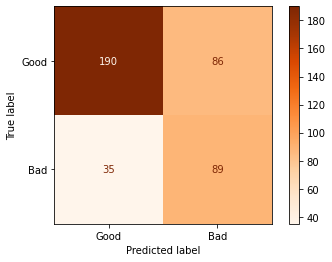

In [18]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_preds, labels=[1, 0])

print(conf_matrix)

print("#### Model's accuracy:  {:.2f}".format(classifier.score(data_scaler.transform(dummy_test), y_test)))

class_names = ['Good', 'Bad']
disp = plot_confusion_matrix(classifier, data_scaler.transform(dummy_test), 
                             y_test, display_labels=class_names, 
                             cmap=plt.cm.Oranges, 
                             normalize=None, values_format='.0f', labels=[1, 0])


In [19]:
import pickle


In [22]:
with open('./webservice/static/credit_model.pkl', 'wb') as stream:pickle.dump(classifier, stream)



In [23]:
with open('./webservice/static/data_scaler.pkl', 'wb') as stream:
    pickle.dump(data_scaler, stream)


In [24]:
with open('./webservice/static/dict_vectorizer.pkl', 'wb') as stream:
    pickle.dump(dv, stream)


In [25]:
!pip install scikit-learn==0.23.1


In [26]:
!pip install pywin32


ERROR: Could not find a version that satisfies the requirement pywin32 (from versions: none)
ERROR: No matching distribution found for pywin32
